In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
sentences = [
    'I love my dog',
    'i love my cat',
    'yo yo hello cat rajat'
]

In [36]:
tokenizer = Tokenizer(num_words=100)

In [37]:
tokenizer.fit_on_texts(sentences)

In [38]:
word_index = tokenizer.word_index

In [39]:
word_index

{'i': 1,
 'love': 2,
 'my': 3,
 'cat': 4,
 'yo': 5,
 'dog': 6,
 'hello': 7,
 'rajat': 8}

In [40]:
sequences = tokenizer.texts_to_sequences(sentences)

In [41]:
sequences

[[1, 2, 3, 6], [1, 2, 3, 4], [5, 5, 7, 4, 8]]

In [42]:
padded = pad_sequences(sequences)

In [43]:
padded

array([[0, 1, 2, 3, 6],
       [0, 1, 2, 3, 4],
       [5, 5, 7, 4, 8]])

In [52]:
##############   sarcastic = 1, not sarcastic = 0

## NLP Sentiment Classifier

In [81]:
import json
import pandas as pd
import seaborn as sns
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [82]:
import pandas as pd

df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)


In [83]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [84]:
df.shape

(26709, 3)

In [85]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

<Axes: xlabel='is_sarcastic', ylabel='Count'>

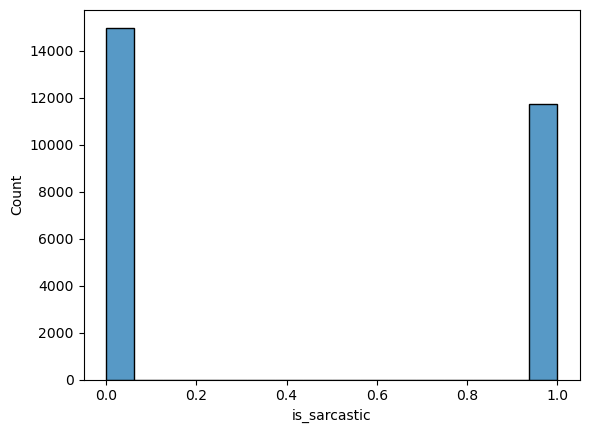

In [86]:
sns.histplot(df.is_sarcastic)

In [87]:
from sklearn.model_selection import train_test_split

In [103]:
features = df['headline']
target = df['is_sarcastic']

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [105]:
######

In [91]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [109]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [132]:
print(training_padded.shape)
print(Y_train.shape)
print(testing_padded.shape)
print(Y_test.shape)


(20031, 100)
(20031,)
(6678, 100)
(6678,)


In [111]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [113]:
###### fit the model

In [114]:
num_epochs = 30
history = model.fit(training_padded, Y_train, epochs=num_epochs, validation_data=(testing_padded, Y_test), verbose=2)


Epoch 1/30
626/626 - 2s - loss: 0.6675 - accuracy: 0.5847 - val_loss: 0.5880 - val_accuracy: 0.6953 - 2s/epoch - 4ms/step
Epoch 2/30
626/626 - 1s - loss: 0.4299 - accuracy: 0.8267 - val_loss: 0.3774 - val_accuracy: 0.8387 - 1s/epoch - 2ms/step
Epoch 3/30
626/626 - 1s - loss: 0.3050 - accuracy: 0.8791 - val_loss: 0.3420 - val_accuracy: 0.8556 - 1s/epoch - 2ms/step
Epoch 4/30
626/626 - 2s - loss: 0.2560 - accuracy: 0.8985 - val_loss: 0.3461 - val_accuracy: 0.8485 - 2s/epoch - 2ms/step
Epoch 5/30
626/626 - 2s - loss: 0.2198 - accuracy: 0.9162 - val_loss: 0.3355 - val_accuracy: 0.8562 - 2s/epoch - 2ms/step
Epoch 6/30
626/626 - 2s - loss: 0.1943 - accuracy: 0.9269 - val_loss: 0.3445 - val_accuracy: 0.8561 - 2s/epoch - 3ms/step
Epoch 7/30
626/626 - 2s - loss: 0.1724 - accuracy: 0.9358 - val_loss: 0.3552 - val_accuracy: 0.8555 - 2s/epoch - 3ms/step
Epoch 8/30
626/626 - 1s - loss: 0.1543 - accuracy: 0.9445 - val_loss: 0.3744 - val_accuracy: 0.8528 - 1s/epoch - 2ms/step
Epoch 9/30
626/626 - 2s 

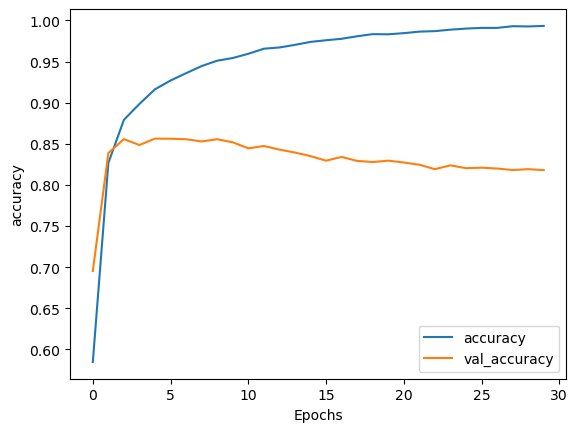

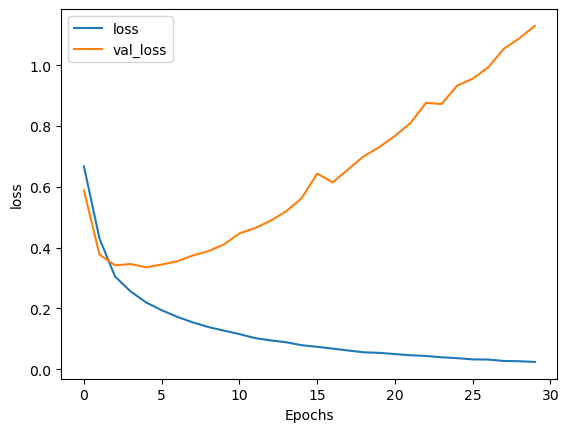

In [116]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [117]:
###### predict

In [125]:
ypred = model.predict(testing_padded)

209/209 [==============================] - 0s 961us/step


In [128]:
ypred

array([[9.9999976e-01],
       [6.6589698e-09],
       [2.8307443e-02],
       ...,
       [1.2756002e-01],
       [1.3814750e-09],
       [4.8523616e-02]], dtype=float32)

In [129]:
threshold = 0.7  # You can adjust this threshold as needed
binary_predictions = (ypred > threshold).astype(int)

# 'binary_predictions' now contains the binary predictions based on the threshold.


In [130]:
binary_predictions

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])